# Inferential Statistics Ia - Frequentism

## I. An introduction to sampling from the Normal distribution

In [180]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

__Q:__ Call up the documentation for the `norm` function imported above. What is the second listed method?

In [42]:
help(norm)

Help on norm_gen in module scipy.stats._continuous_distns object:

class norm_gen(scipy.stats._distn_infrastructure.rv_continuous)
 |  A normal continuous random variable.
 |  
 |  The location (``loc``) keyword specifies the mean.
 |  The scale (``scale``) keyword specifies the standard deviation.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability density function for `norm` is:
 |  
 |  .. math::
 |  
 |      f(x) = \frac{\exp(-x^2/2)}{\sqrt{2\pi}}
 |  
 |  for a real number :math:`x`.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      norm_gen
 |      scipy.stats._distn_infrastructure.rv_continuous
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  fit(self, data, **kwds)
 |      Return MLEs for shape (if applicable), location, and scale
 |      parameters from data.
 |      
 |      MLE stands for Maximum Likelihood Estimate.  Starting estimates for
 |      the

__A:__ cdf()

__Q:__ Use the method that generates random variates to draw five samples from the standard normal distribution.

__A:__ np.random.normal(0,1,5)

In [163]:
seed(47)
# draw five samples here
samples = norm.rvs(size=5) # loc default to 0, scale default to 1
print(samples)

# Alternatively : samples = np.random.normal(0,1,5)

[-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


__Q:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution.

__A:__ The mean of this sample is 0.19. It is close to but not exactly equal to the value I expect, which is zero.

In [164]:
# Calculate and print the mean here, hint: use np.mean()
mean =np.mean(samples)
print(mean)

0.19355593334131074


__Q:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$. Hint: np.sqrt() and np.sum() will be useful here and remember that numpy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__ The standard deviation of these numbers is 0.96.

In [165]:
std = np.sqrt(np.sum((samples-mean)**2)/len(samples))
print(std)

0.9606195639478641


__Q:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

__A:__ The estimated population standard deviation is 1.07

In [166]:
std_pop = np.sqrt(np.sum((samples-mean)**2)/(len(samples)-1))
print(std_pop)

1.0740053227518152


__Q:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

__A:__ It returned the first one, 0.96.

In [167]:
std_np = np.std(samples)
print(std_np)

0.9606195639478641


__Q:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

__A:__ We specify ddof=1 in np.std() to apply the correstion. 

In [168]:
# help(np.std)

#     The average squared deviation is normally calculated as
#     ``x.sum() / N``, where ``N = len(x)``.  If, however, `ddof` is specified,
#     the divisor ``N - ddof`` is used instead. In standard statistical
#     practice, ``ddof=1`` provides an unbiased estimator of the variance
#     of the infinite population. ``ddof=0`` provides a maximum likelihood
#     estimate of the variance for normally distributed variables. The
#     standard deviation computed in this function is the square root of
#     the estimated variance, so even with ``ddof=1``, it will not be an
#     unbiased estimate of the standard deviation per se.

In [34]:
std_correction = np.std(samples, ddof=1)
print(std_correction)

1.0740053227518152


## II Sampling distributions

Let's give our normal distribution a little flavor. Also, for didactic purposes, the standard normal distribution, with its variance equal to its standard deviation of one, would not be a great illustration of a key point. Let us imagine we live in a town of 50000 people and we know the height of everyone in this town. We will have 50000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [43]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

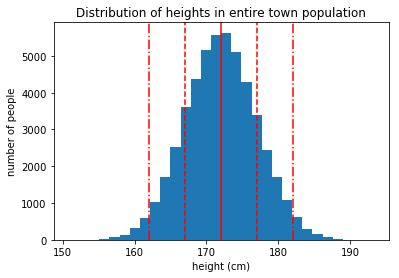

In [44]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Now, 50000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [45]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [46]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

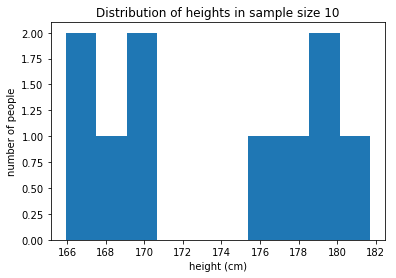

In [8]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

The sample distribution doesn't look much like what we know (but wouldn't know in real-life) the population distribution looks like. What do we get for the mean?

In [47]:
np.mean(daily_sample1)

173.47911444163503

And if we went out and repeated this experiment?

In [48]:
daily_sample2 = townsfolk_sampler(10)

In [49]:
np.mean(daily_sample2)

173.7317666636263

__Q:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

__A:__ See codes below.

In [57]:
seed(47)
# take your samples here
means = np.empty(365)
for i in range(365):
    means[i] = np.mean(townsfolk_sampler(10))

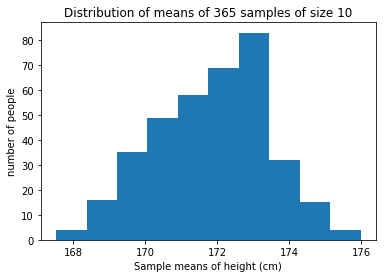

In [58]:
# Plot the distribution of sample means 

_ = plt.hist(means,bins=10)
_ = plt.xlabel('Sample means of height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of means of 365 samples of size 10')

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

__Q:__ Verify the above results from the CLT.

__A:__ These results are verified below.

In [59]:
# calculate mean and std of means
print(np.mean(means))
print(np.std(means))

# population std can be calculated as : np.std(means)*np.sqrt(10) = 4.98

171.8660049358649
1.5756704135286475


__Q:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year!) Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

__A:__ The ditsribution of sample means is expected to be narrower (more consistent, smaller standard deviation) with increased sample size. This is indeed the case: the standard deviation of this distribution is 0.67.

In [61]:
seed(47)
# calculate daily means from the larger sample size here
means_large = np.empty(365)
for i in range(365):
    means_large[i] = np.mean(townsfolk_sampler(50))

In [62]:
# calculate mean and std of means_large
print(np.mean(means_large))
print(np.std(means_large))

171.94366080916114
0.6736107539771146


### III Normally testing times!

Recall some basic properties of the standard Normal distribution, such as about 68% of observations being within plus or minus 1 standard deviation of the mean.

__Q:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

In [67]:
p = 0.5 + 0.68/2
print(p)

0.8400000000000001


__A:__ 0.84

Calculating this probability involved calculating the area under the pdf from the value of 1 and below. To put it another way, we need to integrate the pdf. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above. One way to do this is using look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

__Q:__ Use the cdf() function to answer the question above again and verify you get the same answer.

__A:__ norm.cdf(1) 

In [76]:
norm.cdf(1)

0.8413447460685429

__Q:__ Using our knowledge of the population parameters for our townsfolk's heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

__A:__ The probability is 0.84.

In [159]:
# help(norm.cdf)
approach1 = 0.5 + 0.68/2 # since 177-172 = 5 , which equals one standard deviation. 
approach2 = norm.cdf(177,loc=172,scale=5)
print(approach1, approach2)

0.8400000000000001 0.8413447460685429


__Q:__ Turning this question around. Let's say we randomly pick one person and measure their height and find they are 2.00 m tall? How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

__A:__ The probability is nearly zero.

In [171]:
round(1-norm.cdf(200,loc=172,scale=5),2)

0.0

__Q:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf())
* Calculate the 95% Confidence Interval of the mean
* Does this interval include the true population mean?

__A:__ This interval includes the true population mean.

In [172]:
seed(47)
# take your sample now
sample =np.random.choice(pop_heights,50)

# If sample for 100 times:
# means = np.empty(100)
# # Randomly sample 100 times
# for i in range(100):
#      means[i]= np.mean(np.random.choice(pop_heights,50))

In [173]:
mean = np.mean(sample)
print(mean)

172.7815108576788


In [174]:
s = np.std(sample,ddof=1) # use n-1 for unbiased estimate of popualtion std
print(s)

4.195424364433547


In [175]:
# 95% margin of error
ME = 1.96*(s/np.sqrt(50))
# Use z score since sample size > 30
print(ME)

# norm.ppf(0.975) = 1.96

1.162912303074119


In [178]:
norm.ppf(0.975)

1.959963984540054

In [177]:
# 95% confidence interval of the mean
CI_upper = mean + 1.96*s/np.sqrt(50)
CI_lower = mean - 1.96*s/np.sqrt(50)
print(CI_lower,CI_upper) # Include the true population mean

171.6185985546047 173.9444231607529


__Q:__ Above we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

__A:__ Z scores are used when population standard deviation is known or when sample size is large. However, we do not know population standard deviation and sample size is not very large(stictly speaking). We were using an estimate of population standard deviation instead of the real value. 

__Q:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

__A:__ The confidence interval for the mean using _t_ distribution is slightly wider than the one above

In [181]:
# 95% confidence interval of the mean using t distribution
tvalue= t.ppf(0.975,49)

CI_upper2 = mean + tvalue*s/np.sqrt(50)
CI_lower2 = mean - tvalue*s/np.sqrt(50)
print(CI_lower2,CI_upper2)

171.589184447403 173.9738372679546


In [184]:
print(tvalue)

2.009575234489209


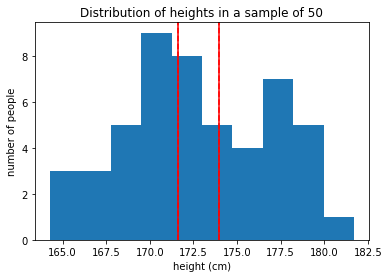

In [182]:
_ = plt.hist(sample)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in a sample of 50')
_ = plt.axvline(171.61, color='r')
_ = plt.axvline(173.94, color='r')
_ = plt.axvline(171.59, color='r', linestyle='--')
_ = plt.axvline(173.97,color='r',linestyle='--')


This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.